# Gradient Descent

Date: 13/11/2020

Author: Sara Bengoechea Rodríguez

## Description and Data Dictionary

The dataset that we will be using to obtain the gradient descent has information about an University admission process based on two exams. The first column contains the grades for the first exam, the second column for the second exam and the last colum indicates whether the process was satisfactory or not.

This dataset contains 100 rows corresponding to 100 different students and 3 columns. Additionaly, it does not need any data cleaning since there are not null values nor duplicates.

## Libraries and data import

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import lmplot
import numpy as np
%matplotlib inline

In [31]:
file_path = "../data/01_raw/4_1_data.csv"

In [32]:
data = pd.read_csv(file_path)

In [33]:
data.head()

,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Before starting with our task, let's check some of the most relevant statistics of our dataset.

In [50]:
data.describe()

,score-1,score-2,label
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


## Binary Clasification

We create an arrray with the scores and another array with the results.
Results is a binomial variable that can take values 0 or 1 depending on "not being accepted" or "being accepted" respectively.

In [34]:
scores = data[['score-1', 'score-2']].values 
results = data['label'].values

We create an object (type array) called "passed" when results are 1, and another one named "failed" when resuls equal 0.

In [35]:
passed = (results == 1).reshape(100, 1) 
failed = (results == 0).reshape(100, 1)


We plot the results from both tests. The x-axis represents the results of the first test, and the y-axis from the second test. As shown on the legend, green points are for students who passed the procces and red crosses for those who didn't.

It can be seen how only a few students failed one of the exams and still made it to pass the process.

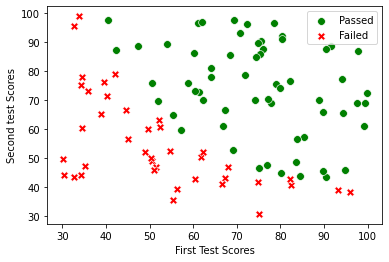

In [36]:
ax = sns.scatterplot(x = scores[passed[:, 0], 0],  
                     y = scores[passed[:, 0], 1],
                     marker = "o",
                     color = "green",
                     s = 60)
sns.scatterplot(x = scores[failed[:, 0], 0],
                y = scores[failed[:, 0], 1],
                marker = "X",
                color = "red",
                s = 60)

ax.set(xlabel="First Test Scores", ylabel="Second test Scores")
ax.legend(["Passed", "Failed"])
plt.show();

## Logistic Regression

Now we will proceed to obtain the logistic regression. Given x and y we need to find ŷ  such as ŷ =P(y=1|x) where 0≤ŷ ≤1. 

This ŷ is the prediction of the likelyhood that the input is classified as "passed".

The objetive of the logistic regression is to minimize the cost function for the gradient vector.

In [37]:
def logistic_function(x):    
    return 1/ (1 + np.exp(-x)) # 1/(1+ e^-x) where x can be an array (bc using np library)

The logistic function will look as shown below. Note that its values are always between values 0 and 1 

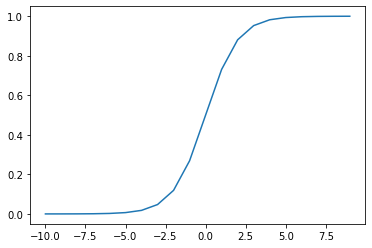

In [38]:
x = np.arange(-10., 10., 1)
y = logistic_function(x)
plt.plot(x,y)
plt.show()

## Cost Function

Now we need to compute the cost function, that aggregates the loss function result for every (xi,yi) and is the following:
$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$


In [39]:
def compute_cost(theta, x, y): # The variables of the cost function are theta, x and y
    n = len(y) # the observations
    y_pred = logistic_function(np.dot(x , theta)) # logistic function of the the product of arrays
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred)) # loss(error) function formula
    cost = -1 / n * sum(error) # Cost function
    gradient = 1 / n * np.dot(x.transpose(), (y_pred - y)) # gradient combines the cost and the error function
    return cost[0] , gradient # 0 because you want to minimize the cost

We will now define some objects that we will need further on and obtain the cost and gradient at initialization.

In [42]:
mean_scores = np.mean(scores, axis=0) #mean exam results
std_scores = np.std(scores, axis=0) # standard deviation
scores = (scores - mean_scores) / std_scores # standardization of scores 

rows = scores.shape[0] # number of rows (100)
cols = scores.shape[1] # number of columns (2)

X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept (1)
y = results.reshape(rows, 1) # array as a matrix with 0 and 1 depending on succeed or fail.

theta_init = np.zeros((cols + 1 , 1)) # initial theta are the initial parameters 
cost, gradient = compute_cost(theta_init, X, y) #cost of initial theta 

print("Cost at initialization", cost) # Print cost at initialization
print("Gradient at initialization:", gradient) #Print the gradient at initialization

Cost at initialization 0.693147180559946
Gradient at initialization: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


## Gradient Descent

The next step is to write the gradient descent function. The goal is that it figures out how to change the parameters to improve in the next iteration so that we move in a direction thah diminishes the error cost. 

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence $\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [41]:
def gradient_descent(x, y, theta, alpha, iterations): # the variables of the gradient_descent function are x, y, theta, alpha, iterations
    costs = []
    for i in range(iterations): # iterate 
        cost, gradient = compute_cost(theta, x, y) # minimize the cost as long as we move along the gradient
        theta -= (alpha * gradient) # alpha is the learning rate
        costs.append(cost)
    return theta, costs

We can initialize the theta and cost with a learning rate or alpha of 1 and 800 iterations

In [299]:
theta, costs = gradient_descent(X, y, theta_init, 1, 800)

In [300]:
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[1.71288923]
 [3.98091615]
 [3.71364897]]
Resulting cost: 0.2034985937097929


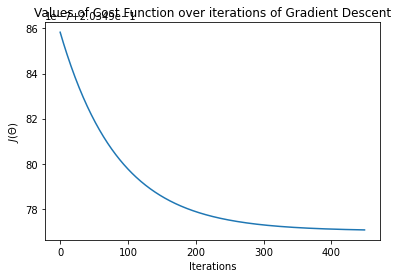

In [303]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

From aproximately 400 iterations with a learning ratae of 1, the cost barely diminish, which means that it is not worth it to keep iterating. Next we will check it with 450 iterations.

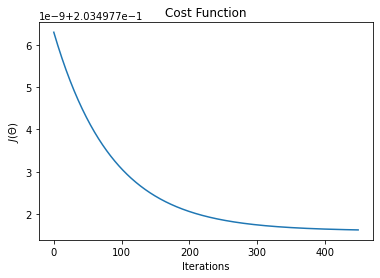

In [304]:
theta, costs = gradient_descent(X, y, theta_init, 1, 450)

plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Cost Function");

We can now check how with only 450 iteretions we could achieve a low cost that is appropiate for us. It is not the global minimum but keeping iterating is not worth it due to computational costs.

### References:
* https://github.com/lmntrixsid/Linear-and-Logistic-Regression-with-NumPy-and-Python/blob/master/Logistic_Regression_Completed.ipynb (guideline)
* https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers (markers for the graph)
* https://numpy.org/doc/stable/reference/generated/numpy.exp.html (for undestanding logistic function)
* https://numpy.org/doc/stable/reference/generated/numpy.dot.html (numpy.dot)
* https://www.youtube.com/watch?v=A6FiCDoz8_4&feature=emb_title (overall understanding of gradient descent)